# Objectives
- Clean data and initial exploratory 
- Key metrics analysis: converstion rate and retention rate
  - def function to access both metrics 
- Inconsistence checking and resolving 
  - if the difference has impact on conversion rate by using assumption
- A/B test, lift and statistical significance

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
mkt = pd.read_csv('/QXJ/Python/Datacamp/Marketing/marketing_1.csv', index_col = 0, parse_dates = ['date_served','date_subscribed', 'date_canceled'])
mkt.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ad,channel_code,day_served
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,True,1.0,0.0


In [4]:
mkt.shape

(10037, 12)

In [5]:
mkt.columns

Index(['user_id', 'date_served', 'marketing_channel', 'variant', 'converted',
       'language_displayed', 'language_preferred', 'age_group',
       'date_subscribed', 'date_canceled', 'subscribing_channel',
       'is_retained'],
      dtype='object')

In [9]:
mkt.duplicated(subset = 'user_id').sum()

2728

In [10]:
mkt['marketing_channel'].unique()

array(['House Ads', 'Push', 'Facebook', 'Instagram', 'Email', nan],
      dtype=object)

In [11]:
mkt.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [16]:
mkt.dtypes

user_id                object
date_served            object
marketing_channel      object
variant                object
converted              object
language_displayed     object
language_preferred     object
age_group              object
date_subscribed        object
date_canceled          object
subscribing_channel    object
is_retained            object
dtype: object

In [17]:
mkt.isna().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                15
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained            8181
dtype: int64

In [18]:
mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


## Clean datat

### 1. Data types and data merging

In [32]:
mkt['converted'] = mkt['converted'].astype('bool')

In [34]:
mkt['variant'].unique()

array(['personalization', 'control'], dtype=object)

In [35]:
mkt['language_displayed'].unique()

array(['English', 'German', 'Arabic', 'Spanish'], dtype=object)

In [36]:
mkt['language_preferred'].unique()

array(['English', 'German', 'Arabic', 'Spanish'], dtype=object)

In [37]:
mkt['age_group'].unique()

array(['0-18 years', '19-24 years', '24-30 years', '30-36 years',
       '36-45 years', '45-55 years', '55+ years'], dtype=object)

In [38]:
mkt['subscribing_channel'].unique()

array(['House Ads', 'Email', 'Push', 'Facebook', 'Instagram', nan],
      dtype=object)

In [41]:
mkt['is_retained'] = mkt['is_retained'].astype('bool')
mkt['is_retained'].dtype

dtype('bool')

In [42]:
# create a boolean column 
mkt['is_house_ad'] = np.where(mkt['marketing_channel'] == 'House Ads', 
                              True, False)
mkt.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ad
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True,True


In [44]:
# create a new column
channel_dict = {'House Ads': 1, 'Push': 5, 'Facebook':3, 
                'Instagram': 2, 'Email':4}
mkt['channel_code'] = mkt['marketing_channel'].map(channel_dict)
mkt.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ad,channel_code
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True,True,1.0
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True,True,1.0
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True,True,1.0
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True,True,1.0
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True,True,1.0


In [45]:
# parse dates 
mkt['date_served'] = pd.to_datetime(mkt['date_served'])
mkt['date_subscribed'] = pd.to_datetime(mkt['date_subscribed'])
mkt['date_canceled'] = pd.to_datetime(mkt['date_canceled'])

In [47]:
# add dayofweek column based on date_served
mkt['day_served'] = mkt['date_served'].dt.dayofweek
mkt.tail()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,is_house_ad,channel_code,day_served
10032,a100007290,2018-01-17,Email,control,True,German,German,45-55 years,2018-01-17,2018-01-24,Email,False,False,4.0,2.0
10033,a100007291,2018-01-17,Email,control,True,German,German,55+ years,2018-01-17,NaT,Email,True,False,4.0,2.0
10034,a100007292,2018-01-05,Instagram,control,False,German,German,55+ years,2018-01-17,NaT,Email,True,False,2.0,4.0
10035,a100007293,2018-01-17,Email,control,True,German,German,0-18 years,2018-01-17,NaT,Email,True,False,4.0,2.0
10036,a100007294,2018-01-06,Facebook,control,False,German,German,0-18 years,2018-01-17,NaT,Email,True,False,3.0,5.0


In [48]:
mkt.to_csv('/QXJ/Python/Datacamp/Marketing/marketing_1.csv')

In [9]:
mkt.info()
# confirm the dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10037 entries, 0 to 10036
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10037 non-null  bool          
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          10037 non-null  bool          
 12  is_house_ad          10037 non-null  bool          
 13  channel_code         10022 non-

### 2. Initial exploratory 

In [61]:
# aggregate unique users by served_date 
daily_users = mkt.groupby('date_served')['user_id'].nunique()
daily_users.head()
# each day has around 300 new cusotmers 

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64

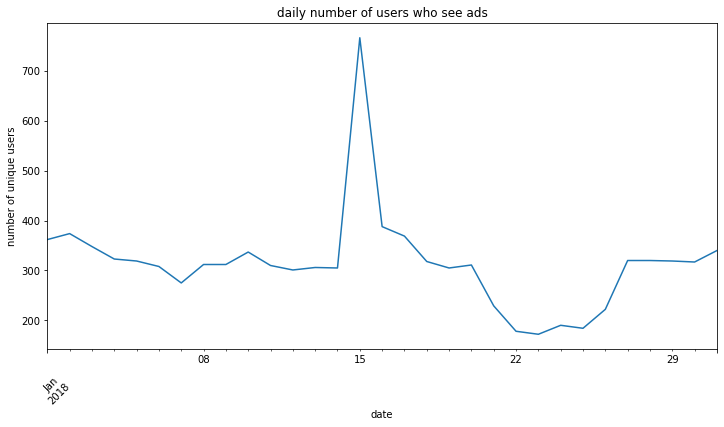

In [60]:
plt.figure(figsize = (12,6))
daily_users.plot()

plt.title('daily number of users who see ads')
plt.xlabel('date')
plt.ylabel('number of unique users')
plt.xticks(rotation = 45)
plt.show()

## Maketing metrics
- conversion rate
- retention rate

In [63]:
# the number of converted users
subscribers = mkt[mkt['converted'] == True]['user_id'].nunique()
subscribers

1030

In [64]:
# total users 
users = mkt['user_id'].nunique()
users

7309

In [69]:
conv_rate = subscribers / users
print(round(conv_rate * 100, 2), '%')

14.09 %


In [85]:
retained = mkt[(mkt['is_retained'] == True)&(mkt['converted'] == True)]\
['user_id'].nunique()
retention_rate = retained / subscribers
print(round(retention_rate * 100, 2), '%')

67.57 %


### 3. Cusomer segmentation analysis by conversion rate and retention rate
- age/gender/location
- past interaction with the business
- marketing channels users interacted with

**Compare retention rate by subscribing channel**

In [97]:
# segment only the ones click house ad
house_ad = mkt[mkt['subscribing_channel'] == 'House Ads']

# calculate retention rate
retained = house_ad[(house_ad['is_retained'] == True)]['user_id'].nunique()
subscribers = house_ad[house_ad['converted'] == True]['user_id'].nunique()
r_rate_house = retained / subscribers

print(round(r_rate_house * 100, 2), '%')

58.05 %


In [100]:
# compare across the all channels
email = mkt[mkt['subscribing_channel'] == 'Email']

# calculate retention rate
retained = email[(email['is_retained'] == True)]['user_id'].nunique()
subscribers = email[email['converted'] == True]['user_id'].nunique()
r_rate_email = retained / subscribers

print(round(r_rate_email * 100, 2), '%')

87.58 %


In [101]:
# compare across the all channels
push = mkt[mkt['subscribing_channel'] == 'Push']

# calculate retention rate
retained = push[(push['is_retained'] == True)]['user_id'].nunique()
subscribers = push[push['converted'] == True]['user_id'].nunique()
r_rate_push = retained / subscribers

print(round(r_rate_push * 100, 2), '%')

70.13 %


In [103]:
# compare across the all channels
facebook = mkt[mkt['subscribing_channel'] == 'Facebook']

# calculate retention rate
retained = facebook[(facebook['is_retained'] == True)]['user_id'].nunique()
subscribers = facebook[facebook['converted'] == True]['user_id'].nunique()
r_rate_facebook = retained / subscribers

print(round(r_rate_facebook * 100, 2), '%')

68.78 %


In [108]:
# compare across the all channels
instagram = mkt[mkt['subscribing_channel'] == 'Instagram']

# calculate retention rate
retained = instagram[(instagram['is_retained'] == True)]['user_id'].nunique()
subscribers = instagram[instagram['converted'] == True]['user_id'].nunique()
r_rate_instagram = retained / subscribers

print(round(r_rate_instagram * 100, 2), '%')

68.1 %


retention rate of different **subscribing channel**
- House_ad: 58.05%
- Push: 70.13%
- Instagram: 68.1%
- Email: 87.58%
- Facebook: 68.78%

In [118]:
# alternative to calculate the all the segmentations 
retained = mkt[mkt['is_retained'] == True].groupby('subscribing_channel')\
['user_id'].nunique()
subscribers = mkt[mkt['converted'] == True].groupby('subscribing_channel')\
['user_id'].nunique()
print(round(retained/subscribers * 100, 2))

subscribing_channel
Email        87.58
Facebook     68.78
House Ads    58.05
Instagram    68.10
Push         70.13
Name: user_id, dtype: float64


**Compare conversion rate by displayed language**

In [22]:
# Group by language_displayed and count unique users
total = mkt.groupby('language_displayed')['user_id'].nunique()

# Group by language_displayed and count unique conversions
subscribers = mkt[mkt['converted'] == True].groupby('language_displayed')['user_id'].nunique()

# Calculate the conversion rate for all languages
language_conversion_rate = subscribers/total
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


*whether there is any difference in the conversion rate based on when in the month*

In [23]:
# Group by date and language_displayed and count unique users
total = mkt.groupby(['date_served','language_displayed'])['user_id'].nunique()

# Group by date and language_displayed and count unique conversions
subscribers = mkt[mkt['converted'] == True].groupby(['date_served','language_displayed'])['user_id'].nunique()

# Calculate the conversion rate for all languages by dates
date_language_conversion_rate = subscribers/total
print(round(date_language_conversion_rate * 100,2))

date_served  language_displayed
2018-01-01   Arabic                100.00
             English                 9.28
             German                 20.00
             Spanish                  NaN
2018-01-02   Arabic                   NaN
                                    ...  
2018-01-30   Spanish                  NaN
2018-01-31   Arabic                   NaN
             English                 5.36
             German                   NaN
             Spanish                  NaN
Name: user_id, Length: 81, dtype: float64


In [39]:
# Daily retention rate
total = mkt.groupby('date_subscribed')['user_id'].nunique()
subscribers = mkt[mkt['is_retained'] == True].groupby('date_subscribed')['user_id'].nunique()

date_r_rate = subscribers/total
print(round(date_r_rate * 100,2))

date_subscribed
2018-01-01    77.78
2018-01-02    70.27
2018-01-03    72.97
2018-01-04    50.00
2018-01-05    57.50
2018-01-06    75.68
2018-01-07    52.63
2018-01-08    63.89
2018-01-09    67.50
2018-01-10    68.29
2018-01-11    61.54
2018-01-12    39.13
2018-01-13    50.00
2018-01-14    61.54
2018-01-15    71.43
2018-01-16    70.19
2018-01-17    61.63
2018-01-18    73.33
2018-01-19    68.42
2018-01-20    80.95
2018-01-21    76.19
2018-01-22    77.27
2018-01-23    71.43
2018-01-24    65.22
2018-01-25    56.52
2018-01-26    80.00
2018-01-27    57.14
2018-01-28    66.67
2018-01-29    75.00
2018-01-30    71.43
2018-01-31    66.67
Name: user_id, dtype: float64


### 4. Plottig the result 

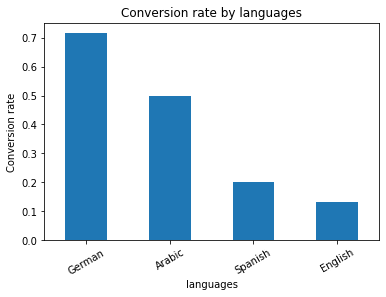

In [36]:
language_conversion_rate.sort_values(ascending = False).plot(kind='bar')
plt.title('Conversion rate by languages')
plt.ylabel('Conversion rate')
plt.xlabel('languages')
plt.xticks(rotation = 30)
plt.show()

**Cohort analysis**

In [43]:
# create a new df and reset the index 
daily_r_rate = pd.DataFrame(date_r_rate.reset_index())

# rename the columns 
daily_r_rate.columns = ['date_subscribed', 'retention_rate']
daily_r_rate.head()

,date_subscribed,retention_rate
0,2018-01-01,0.777778
1,2018-01-02,0.702703
2,2018-01-03,0.729730
3,2018-01-04,0.500000
4,2018-01-05,0.575000


<Figure size 864x432 with 0 Axes>

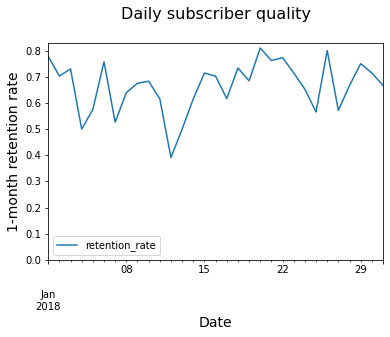

In [49]:
# cohort analysis plot
plt.figure(figsize = (12,6))
daily_r_rate.plot('date_subscribed','retention_rate')
plt.title('Daily subscriber quality\n', size = 16)
plt.ylabel('1-month retention rate', size = 14)
plt.xlabel('Date',size = 14)
plt.ylim(0)
plt.show()

In [50]:
# Customer languages preferance 
language = mkt.groupby(['date_served', 'language_preferred'])\
['user_id'].count()
language.head()

date_served  language_preferred
2018-01-01   Arabic                  4
             English               355
             German                  5
             Spanish                11
2018-01-02   Arabic                  4
Name: user_id, dtype: int64

In [52]:
# transfer to wide list, set level to 1 to unstack the 2rd index 
language = pd.DataFrame(language.unstack(level = 1))
language.head()

language_preferred,Arabic,English,German,Spanish
date_served,,,,
2018-01-01,4.0,342.0,5.0,11.0
2018-01-02,4.0,355.0,5.0,10.0
2018-01-03,3.0,334.0,3.0,8.0
2018-01-04,2.0,305.0,2.0,14.0
2018-01-05,1.0,303.0,2.0,14.0


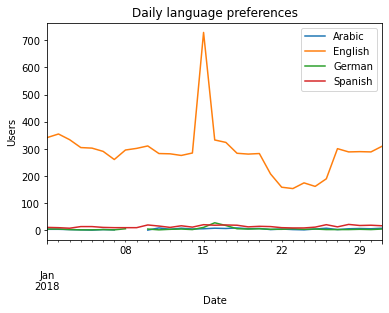

In [54]:
language.plot()
plt.title('Daily language preferences')
plt.xlabel('Date')
plt.ylabel('Users')
plt.legend(loc = 'upper right',
          labels = language.columns.values)
plt.show()

In [62]:
# Customer languages preferance 
language_age = mkt.groupby(['language_preferred', 'age_group'])\
['user_id'].count()
language_age.head()

language_preferred  age_group  
Arabic              0-18 years     19
                    19-24 years    26
                    24-30 years    19
                    30-36 years    19
                    36-45 years    19
Name: user_id, dtype: int64

In [63]:
language_age = pd.DataFrame(language_age.unstack(level = 1))
language_age

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
language_preferred,,,,,,,
Arabic,19,26,19,19,19,21,22
English,1421,1560,1442,1251,1260,1240,1101
German,31,29,35,16,19,25,12
Spanish,68,67,72,69,55,67,52


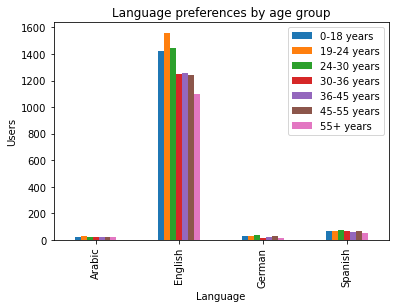

In [70]:
language_age.plot(kind = 'bar')
plt.title('Language preferences by age group')
plt.xlabel('Language')
plt.ylabel('Users')
plt.legend(loc = 'upper right', labels = language_age.columns.values)
plt.show()

### 5. Convertion attributes
- define functions of conversion rate and retention rate
- inconsistence checking: language_displayed <> language_perferred
- Expected conversion rate - actual conversion rate 
  - calculate conversion_rate index based on English 

**Build retention_rate function**

In [24]:
# Daily retention rate
total = mkt.groupby('date_subscribed')['user_id'].nunique()
subscribers = mkt[mkt['is_retained'] == True].groupby('date_subscribed')['user_id'].nunique()

date_r_rate = subscribers/total
print(round(date_r_rate * 100,2))

date_subscribed
2018-01-01    77.78
2018-01-02    70.27
2018-01-03    72.97
2018-01-04    50.00
2018-01-05    57.50
2018-01-06    75.68
2018-01-07    52.63
2018-01-08    63.89
2018-01-09    67.50
2018-01-10    68.29
2018-01-11    61.54
2018-01-12    39.13
2018-01-13    50.00
2018-01-14    61.54
2018-01-15    71.43
2018-01-16    70.19
2018-01-17    61.63
2018-01-18    73.33
2018-01-19    68.42
2018-01-20    80.95
2018-01-21    76.19
2018-01-22    77.27
2018-01-23    71.43
2018-01-24    65.22
2018-01-25    56.52
2018-01-26    80.00
2018-01-27    57.14
2018-01-28    66.67
2018-01-29    75.00
2018-01-30    71.43
2018-01-31    66.67
Name: user_id, dtype: float64


In [25]:
def retention_rate(df, columns):
    retained = df[df['is_retained'] == True]\
    .groupby(columns)['user_id'].nunique()
    
    converted = df[df['converted'] == True]\
    .groupby(columns)['user_id'].nunique()
    
    retention_rate = retained / converted 
    
    return retention_rate

In [56]:
daily_retention = retention_rate(mkt, ['date_subscribed',
                                       'subscribing_channel'])
daily_retention

date_subscribed  subscribing_channel
2018-01-01       Email                  1.000000
                 Facebook               0.875000
                 House Ads              0.687500
                 Instagram              0.750000
                 Push                   1.000000
                                          ...   
2018-01-31       Email                  1.000000
                 Facebook               0.833333
                 House Ads              0.500000
                 Instagram              0.666667
                 Push                   0.500000
Name: user_id, Length: 155, dtype: float64

In [57]:
daily_retention = pd.DataFrame(daily_retention.unstack(level = 1))
daily_retention.head()

subscribing_channel,Email,Facebook,House Ads,Instagram,Push
date_subscribed,,,,,
2018-01-01,1.00,0.875000,0.687500,0.750000,1.000000
2018-01-02,0.75,1.000000,0.588235,0.625000,1.000000
2018-01-03,NaN,0.800000,0.647059,0.909091,0.666667
2018-01-04,1.00,0.666667,0.466667,0.500000,NaN
2018-01-05,1.00,0.571429,0.500000,0.636364,1.000000


<Figure size 1440x720 with 0 Axes>

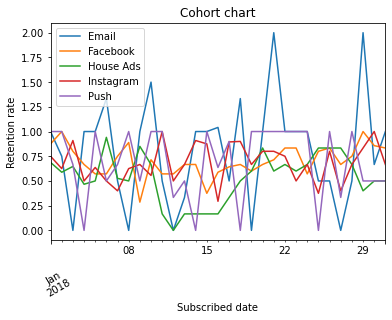

In [79]:
plt.figure(figsize = (20,10))
daily_retention.fillna(0).plot()
plt.xticks(rotation = 30)
plt.xlabel('Subscribed date')
plt.ylabel('Retention rate')
plt.title('Cohort chart')
plt.legend(loc = 'upper left', labels = daily_retention. columns.values )
plt.show()

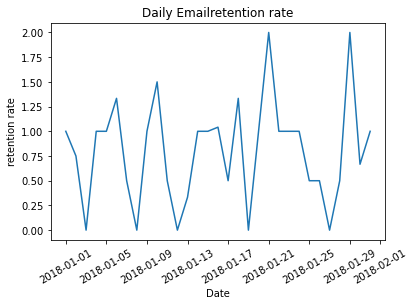

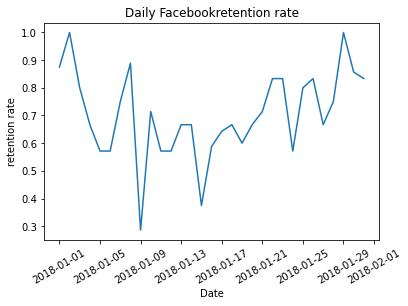

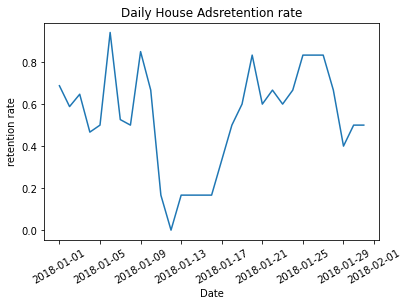

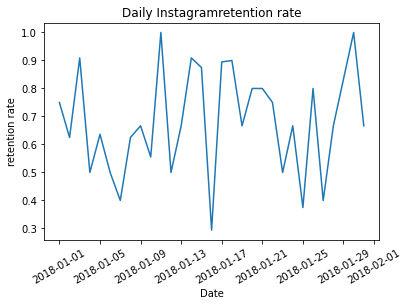

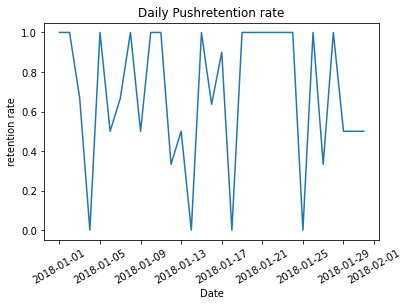

In [80]:
def trend_plot(df):
    for col in df:
        plt.plot(df.index, df[col].fillna(0))
        plt.title('Daily ' + col + 'retention rate')
        plt.xlabel('Date')
        plt.xticks(rotation = 30)
        plt.ylabel('retention rate')
        plt.show()

trend_plot(daily_retention)

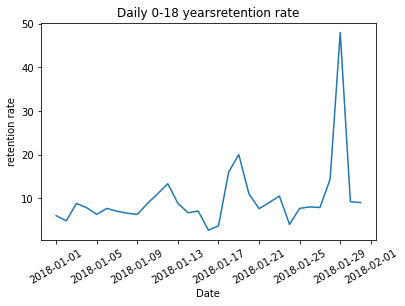

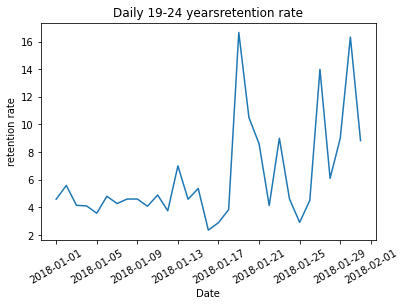

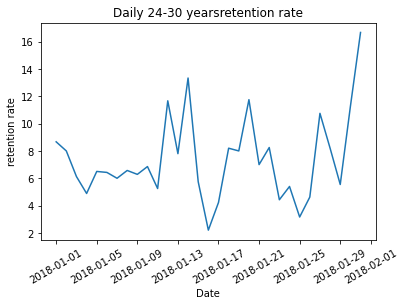

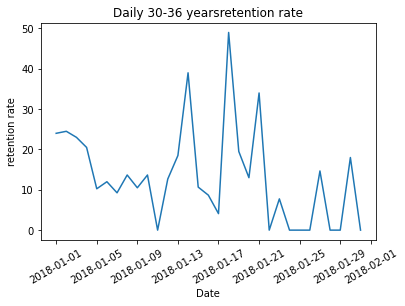

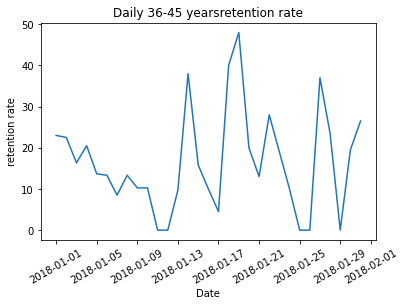

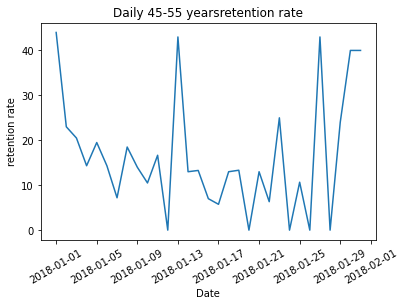

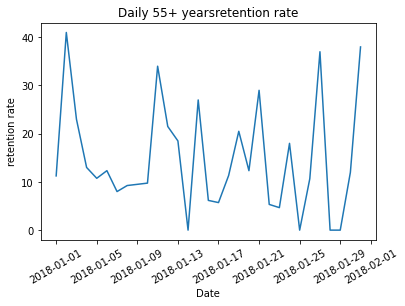

In [83]:
# use function to get insight at cohort groups by age 
age_r = retention_rate(mkt, ['date_served','age_group'])
age_r = pd.DataFrame(age_r.unstack(level = 1))
trend_plot(age_r)

In [166]:
def conversion_rate(df,col):
    converted = mkt[mkt['converted'] == True].groupby(col)['user_id'].nunique()
    total = mkt.groupby(col)['user_id'].nunique()
    conversion_rate = converted / total
    return conversion_rate

conversion_rate(mkt, 'subscribing_channel')

subscribing_channel
Email        0.838542
Facebook     1.000000
House Ads    1.000000
Instagram    1.000000
Push         1.000000
Name: user_id, dtype: float64

## Inconsistence checking

*Which weekday the users like to unscribe the channel??*

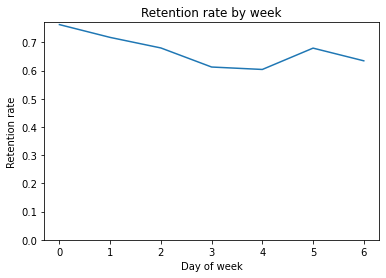

In [91]:
mkt['dow'] = mkt['date_subscribed'].dt.dayofweek
dow = retention_rate(mkt,['dow'])
dow.plot()
plt.xlabel('Day of week')
plt.ylabel('Retention rate')
plt.title('Retention rate by week')
plt.ylim(0)
plt.show()

*The impact of the users whose displayed language is not their preferred language*

In [152]:
df = mkt[['date_served','language_displayed','language_preferred']]
df=pd.DataFrame(df)

In [153]:
df['consistence'] = np.where(df['language_displayed'] == df['language_preferred'], 0, 1)
df

,date_served,language_displayed,language_preferred,consistence
0,2018-01-01,English,English,0
1,2018-01-01,English,English,0
2,2018-01-01,English,English,0
3,2018-01-01,English,English,0
4,2018-01-01,English,English,0
...,...,...,...,...
10032,2018-01-17,German,German,0
10033,2018-01-17,German,German,0
10034,2018-01-05,German,German,0
10035,2018-01-17,German,German,0


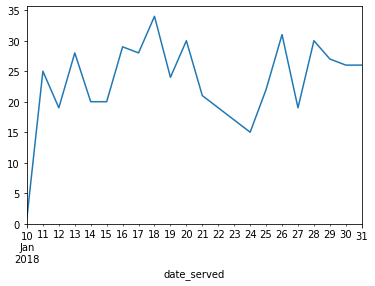

In [165]:
consistence = df[(df['consistence'] == 1)&(df['date_served']>='2018-01-08')]\
.groupby('date_served')['consistence'].sum()
consistence.plot()
plt.ylim(0)
plt.show()

In [169]:
# calculate pre-error conversion rate
# bug arose sometimes around 2018-01-11
lang_bug = mkt[mkt['date_served'] < '2018-01-11']
lang_conv = conversion_rate(lang_bug,'language_displayed')
lang_conv

language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64

In [170]:
# assessing impact
# index other language conversion rate aganist English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']
print('Spanish index:', spanish_index)
print('Arabic index:', arabic_index)
print('German index:', german_index)
# German-speaking users convert 5.46 times the rate of Englsih-speaking users

Spanish index: 1.5236981934112646
Arabic index: 3.8092454835281613
German index: 5.456486773702502


In [187]:
# create actual conversion dataframe
lang_conversion = mkt.groupby(['date_served','language_preferred'])\
.agg({'user_id':'nunique', 'converted':'sum'})
lang_conversion = pd.DataFrame(lang_conversion.unstack(level = 1))
lang_conversion.fillna(0).head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             4.0   342.0    5.0    11.0       3.0    34.0    1.0   
2018-01-02             4.0   355.0    5.0    10.0       0.0    36.0    3.0   
2018-01-03             3.0   334.0    3.0     8.0       0.0    35.0    1.0   
2018-01-04             2.0   305.0    2.0    14.0       0.0    34.0    0.0   
2018-01-05             1.0   303.0    2.0    14.0       1.0    38.0    0.0   

                            
language_preferred Spanish  
date_served                 
2018-01-01             0.0  
2018-01-02             0.0  
2018-01-03             1.0  
2018-01-04             3.0  
2018-01-05             3.0

In [205]:
# create english conversion rate column for affected period
lang_conversion = lang_conversion.loc[ '2018-01-11' : '2018-01-31' ]
lang_conversion['actual_english_rate'] =\
lang_conversion[('converted','English')]
lang_conversion.head(3)

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-11             9.0   283.0    2.0    16.0       0.0    28.0    0.0   
2018-01-12             4.0   282.0    4.0    11.0       0.0    25.0    0.0   
2018-01-13             8.0   276.0    5.0    17.0       1.0    26.0    1.0   

                           actual_english_rate exp_spanish_rate  \
language_preferred Spanish                                        
date_served                                                       
2018-01-11             0.0                28.0        42.663549   
2018-01-12             1.0                25.0        38.092455   
2018-01-13             0.0                26.0        39.616153   

                   exp_arabic_rate exp_german_rate exp_spanish_conv  \
language_preferred                                                    
date_served                                                           
2018-01-11              106.658874      152.781630         6.826168   
2018-01-12               95.231137      136.412169         4.190170   
2018-01-13               99.040383      141.868656         6.734746   

                   exp_arabic_conv exp_german_conv  
language_preferred                                  
date_served                                         
2018-01-11                9.599299        3.055633  
2018-01-12                3.809245        5.456487  
2018-01-13                7.923231        7.093433

In [192]:
# create expected conversion rates for each langauge
lang_conversion['exp_spanish_rate'] = \
lang_conversion['actual_english_rate'] * spanish_index

lang_conversion['exp_arabic_rate'] = \
lang_conversion['actual_english_rate'] * arabic_index

lang_conversion['exp_german_rate'] = \
lang_conversion['actual_english_rate'] * german_index

lang_conversion.head(3)

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-11             9.0   283.0    2.0    16.0       0.0    28.0    0.0   
2018-01-12             4.0   282.0    4.0    11.0       0.0    25.0    0.0   
2018-01-13             8.0   276.0    5.0    17.0       1.0    26.0    1.0   

                           actual_english_rate exp_spanish_rate  \
language_preferred Spanish                                        
date_served                                                       
2018-01-11             0.0                28.0        42.663549   
2018-01-12             1.0                25.0        38.092455   
2018-01-13             0.0                26.0        39.616153   

                   exp_arabic_rate exp_german_rate  
language_preferred                                  
date_served                                         
2018-01-11              106.658874      152.781630  
2018-01-12               95.231137      136.412169  
2018-01-13               99.040383      141.868656

In [201]:
lang_conversion['exp_spanish_conv'] = \
lang_conversion['exp_spanish_rate'] / 100\
* lang_conversion[('user_id', 'Spanish')]

lang_conversion['exp_arabic_conv'] = \
lang_conversion['exp_arabic_rate'] / 100\
* lang_conversion[('user_id', 'Arabic')]

lang_conversion['exp_german_conv'] = \
lang_conversion['exp_german_rate'] / 100\
* lang_conversion[('user_id', 'German')]

lang_conversion.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-11             9.0   283.0    2.0    16.0       0.0    28.0    0.0   
2018-01-12             4.0   282.0    4.0    11.0       0.0    25.0    0.0   
2018-01-13             8.0   276.0    5.0    17.0       1.0    26.0    1.0   
2018-01-14             5.0   285.0    3.0    12.0       0.0    28.0    0.0   
2018-01-15             6.0   729.0   11.0    21.0       0.0    82.0    4.0   

                           actual_english_rate exp_spanish_rate  \
language_preferred Spanish                                        
date_served                                                       
2018-01-11             0.0                28.0        42.663549   
2018-01-12             1.0                25.0        38.092455   
2018-01-13             0.0                26.0        39.616153   
2018-01-14             0.0                28.0        42.663549   
2018-01-15             5.0                82.0       124.943252   

                   exp_arabic_rate exp_german_rate exp_spanish_conv  \
language_preferred                                                    
date_served                                                           
2018-01-11              106.658874      152.781630         6.826168   
2018-01-12               95.231137      136.412169         4.190170   
2018-01-13               99.040383      141.868656         6.734746   
2018-01-14              106.658874      152.781630         5.119626   
2018-01-15              312.358130      447.431915        26.238083   

                   exp_arabic_conv exp_german_conv  
language_preferred                                  
date_served                                         
2018-01-11                9.599299        3.055633  
2018-01-12                3.809245        5.456487  
2018-01-13                7.923231        7.093433  
2018-01-14                5.332944        4.583449  
2018-01-15               18.741488       49.217511

In [203]:
# sum expecteed subscribers for each language
expected_subs = lang_conversion['exp_spanish_conv'].agg('sum') +\
lang_conversion['exp_arabic_conv'].agg('sum') +\
lang_conversion['exp_german_conv'].agg('sum') 

print(expected_subs)

# calculate how many subscribers we actually got
actual_subs = lang_conversion[('converted', 'Spanish')].agg('sum')+\
lang_conversion[('converted', 'Arabic')].agg('sum') +\
lang_conversion[('converted', 'German')].agg('sum')

print(actual_subs)

lost_subs = expected_subs - actual_subs
print('Expected lost conversion rate:', lost_subs)

614.4382972685759
76.0
Expected lost conversion rate: 538.4382972685759


**House ads conversion rate**

In [207]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(mkt, ['date_served', 'marketing_channel'])

print(daily_conv_channel.head())

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


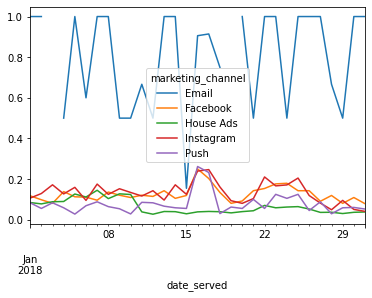

In [208]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(mkt, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack(level = 1))

# Plot results of daily_conv_channel
daily_conv_channel.plot()
plt.show()

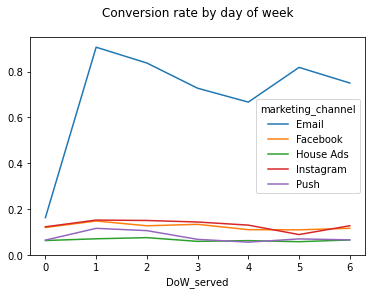

In [209]:
# Add day of week column to marketing
mkt['DoW_served'] = mkt['date_served'].dt.dayofweek

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(mkt, ['DoW_served', 'marketing_channel'])


# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack(level=1))

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

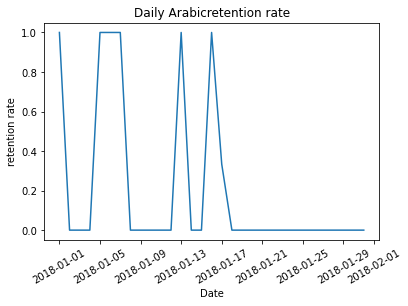

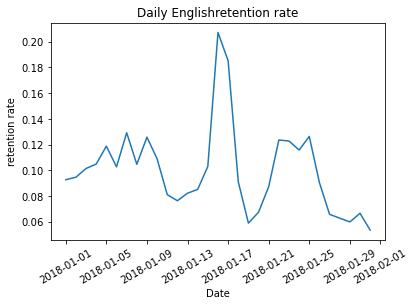

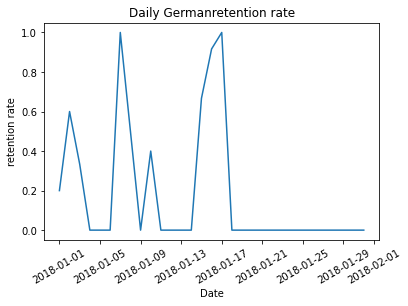

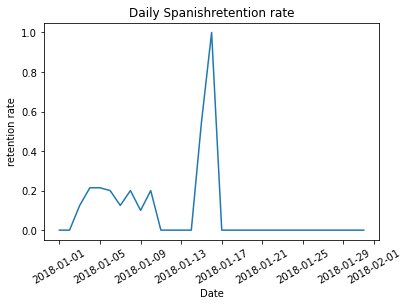

In [211]:
# House ads conversion by language
# Isolate the rows where marketing channel is House Ads
house_ads = mkt[mkt['marketing_channel'] == 'House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served','language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
trend_plot(conv_lang_df)

In [214]:
# Creating a DataFrame for house ads
# Add the new column is_correct_lang
house_ads['is_correct_lang'] = np.where(
    house_ads['language_displayed'] == house_ads['language_preferred'], 
    'Yes', 
    'No')

# Groupby date_served and correct_language
language_check = house_ads.groupby(['date_served','is_correct_lang'])['marketing_channel'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Print results
print(language_check_df.head())

is_correct_lang   No    Yes
date_served                
2018-01-01       2.0  189.0
2018-01-02       3.0  247.0
2018-01-03       0.0  220.0
2018-01-04       0.0  168.0
2018-01-05       0.0  160.0


C:\Users\QXJ\AppData\Local\Temp\ipykernel_2688\894601515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_ads['is_correct_lang'] = np.where(


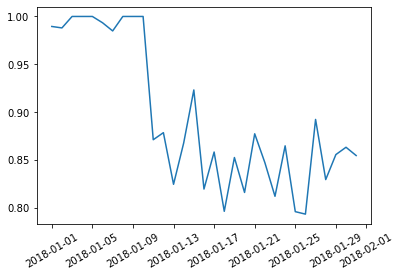

In [216]:
# confirming house ads error
# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/(language_check_df['Yes'] + language_check_df['No'])

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation = 30)
plt.show()

**Setting up conversion indexes**

In [217]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, 'language_displayed')


# Index other language conversion rate against English
spanish_index = lang_conv['Spanish'] /lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German'] /lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.5236981934112646
Arabic index: 3.8092454835281613
German index: 5.456486773702502


In [221]:
# analyzing user preferences
# Group house_ads by date and language
converted = house_ads.groupby(['date_served','language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack(level = 1))

converted_df.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0       2.0    13.0    1.0   
2018-01-02             3.0   200.0    5.0    10.0       0.0    14.0    3.0   
2018-01-03             2.0   179.0    3.0     8.0       0.0    15.0    1.0   
2018-01-04             2.0   149.0    2.0    14.0       0.0    12.0    0.0   
2018-01-05             NaN   143.0    1.0    14.0       NaN    17.0    0.0   

                            
language_preferred Spanish  
date_served                 
2018-01-01             0.0  
2018-01-02             0.0  
2018-01-03             1.0  
2018-01-04             3.0  
2018-01-05             3.0

In [225]:
# Creating a DataFrame based on indexes
# Create English conversion rate column for affected period
converted_df['english_conv_rate'] = converted_df.loc['2018-01-11' : '2018-01-31']\
[('converted','English')]


# Create expected conversion rates for each language
converted_df['expected_spanish_rate'] =spanish_index * converted_df['english_conv_rate'] 
converted_df['expected_arabic_rate'] = arabic_index * converted_df['english_conv_rate'] 
converted_df['expected_german_rate'] = german_index * converted_df['english_conv_rate'] 

# Multiply number of users by the expected conversion rate
converted_df['expected_spanish_conv'] = converted_df['expected_spanish_rate']\
* converted_df[('user_id','Spanish')] /100
converted_df['expected_arabic_conv'] = converted_df['expected_arabic_rate']\
* converted_df[('user_id','Arabic')] /100
converted_df['expected_german_conv'] = converted_df['expected_german_rate']\
* converted_df[('user_id','German')] /100

In [226]:
# assessing bug impact
# Use .loc to slice only the relevant dates
converted_df = converted_df.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted_df['expected_spanish_conv'].sum()\
+ converted_df['expected_arabic_conv'].sum()\
+ converted_df['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted_df[('converted','Spanish')].sum()\
+ converted_df[('converted','Arabic')].sum()\
+ converted_df[('converted','German')].sum()

# Subtract how many subscribers we got despite the bug
lost_subs = expected_subs - actual_subs
print(lost_subs)

28.4409128299394


## A/B test

<br>

*Prior to running the test determine:*

- What is the desired outcome of the test? what is our hypothesis? 
- What is the metric we are trying to impact? (i.e: page view, conversoin)? 
- Will we get enough traffic to our site to reach statistical siginificane and make a decision in a timely manner?

*A/B test: half of emails are generoc upsells to our product whiel the other half contanied personalized messaging around individual usage of our site*

**Step I: check if the test was run proporply ?**

variant
control            270
personalization    284
Name: user_id, dtype: int64


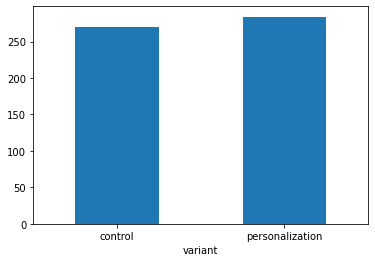

In [231]:
allocation = mkt[mkt['marketing_channel'] == 'Email']\
.groupby(['variant'])['user_id'].nunique()
print(allocation)
allocation.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.show()
# there is statistical test to check if the difference is due to random chance

In [5]:
# group by user_id and variant
email = mkt[mkt['marketing_channel'] == 'Email']
subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
sub = pd.DataFrame(subscribers.unstack(level = 1))
sub

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000534,NaN,False
a100000538,NaN,True
a100000542,NaN,True
...,...,...
a100007288,True,NaN
a100007289,True,NaN
a100007290,True,NaN


In [6]:
# create individual series of control and personalization
control = sub['control'].dropna()
personalization = sub['personalization'].dropna()

In [7]:
# calculate conversion rate
print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


**Step II: calculating lift & significance testing**
- Lift: (treatment conversion rate - control conversion rate) / control conversion rate 
- statistical significance

In [9]:
# calculate lift 
a_mean = np.mean(control)
b_mean = np.mean(personalization)

lift = (b_mean - a_mean)/a_mean
print('lift:', round(lift*100,2), '%')

lift: 38.85 %


In [11]:
# calculate statistical significance 
from scipy.stats import ttest_ind
t = ttest_ind(control, personalization)
print(t)
# the difference id statistical significant

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)


**Pitfall: A/B test and segementation**


In [ ]:
# calculate lift and statistical significance across multiple segments of users

In [10]:
for lang in np.unique(mkt['language_displayed'].values):
    print(lang)
    
    lang_data = mkt[(mkt['marketing_channel'] == 'Email')\
                    & (mkt['language_displayed'] == lang)]
    
    subscribers = lang_data.groupby(['user_id', 'variant'])['converted'].max()
    sub = pd.DataFrame(subscribers.unstack(level = 1))
    
    control = sub['control'].dropna()
    personalization = sub['personalization'].dropna()
    
    a = np.mean(control)
    b = np.mean(personalization)
    lift = (b-a)/a
    print('lift:', round(lift*100,2), '%')
    t = ttest_ind(control, personalization)
    print(t)
    

Arabic
lift: 50.0 %
Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001)
English
lift: 39.0 %
Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815)
German
lift: -1.62 %
Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678)
Spanish
lift: 166.67 %
Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524)


In [12]:
from scipy.stats import ttest_ind
def mkt_channel_result(df,col, mkt_channel):
    """return the lift and statistical sigfinicance about the A/B test of a certain marketing channel """
    for val in np.unique(df[col].values):
        print(val)
        
        val_df = df[(df['marketing_channel'] == mkt_channel)\
        & (df[col] == val)]
        
        subscribers = val_df.groupby(['user_id','variant'])['converted'].max()
        sub = pd.DataFrame(subscribers.unstack(level = 1))
        
        control = sub['control'].dropna()
        personalization = sub['personalization'].dropna()
        
        a = np.mean(control)
        b = np.mean(personalization)
        lift = (b-a)/a
        print('lift:', round(lift*100,2), '%')
        t = ttest_ind(control, personalization)
        print(t)
        
mkt_channel_result(mkt, 'age_group', 'Facebook')
    

0-18 years
lift: 375.5 %
Ttest_indResult(statistic=-4.79410440267648, pvalue=2.779301009264944e-06)
19-24 years
lift: 641.02 %
Ttest_indResult(statistic=-6.703745552570057, pvalue=8.703172251371585e-11)
24-30 years
lift: 742.33 %
Ttest_indResult(statistic=-6.302856383162445, pvalue=1.0980286291676167e-09)
30-36 years
lift: 19.27 %
Ttest_indResult(statistic=-0.3876647512083575, pvalue=0.6986120802081497)
36-45 years
lift: -29.53 %
Ttest_indResult(statistic=0.6341709097448146, pvalue=0.5266434462898644)
45-55 years
lift: -6.17 %
Ttest_indResult(statistic=0.09606018010960825, pvalue=0.9235398169400137)
55+ years
lift: -8.55 %
Ttest_indResult(statistic=0.18071675257359116, pvalue=0.8568014395949484)
